1-Read the file and display it's columns

In [1]:
import pandas as pd
import numpy as np
import statistics as st 

# Load the data
df = pd.read_csv("data.csv")
print(df)
#print(df.shape)
#print(df.info())

       Ship_name Cruise_line  Age  ...  cabins  passenger_density   crew
0        Journey     Azamara    6  ...    3.55              42.64   3.55
1          Quest     Azamara    6  ...    3.55              42.64   3.55
2    Celebration    Carnival   26  ...    7.43              31.80   6.70
3       Conquest    Carnival   11  ...   14.88              36.99  19.10
4        Destiny    Carnival   17  ...   13.21              38.36  10.00
..           ...         ...  ...  ...     ...                ...    ...
153       Taurus        Star   22  ...    0.33              50.62   0.59
154        Virgo        Star   14  ...    9.67              39.18  12.00
155       Spirit    Windstar   25  ...    0.74              33.86   0.88
156         Star    Windstar   27  ...    0.74              32.04   0.88
157         Surf    Windstar   23  ...    1.56              47.87   1.80

[158 rows x 9 columns]


2. Calculate basic statistics (count, mean, std, etc). Examine the data and state any observations you find.


In [2]:
df.describe()


,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


3. Select the columns that will probably be important to predict the "crew" size

covariance matrix

In [5]:
columns = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

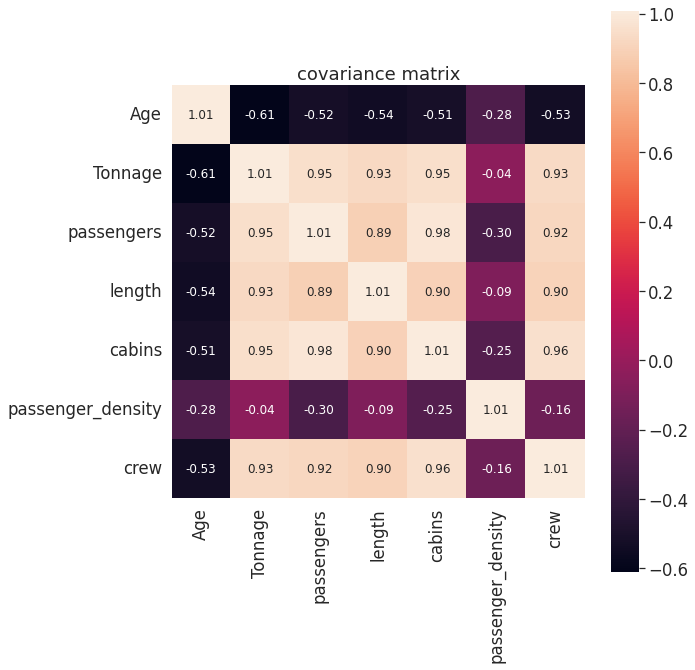

In [6]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=columns,
                 xticklabels=columns)
plt.title('covariance matrix')
plt.tight_layout()
plt.show()

columns that will probably be important to predict the "crew" size:
from the covariance matrix the most important variables are : tonnage, passengers, length', cabins, and crew.


4. If there were any columns removed, please explain why:
if you mean from the covariance matrix the strings columns were removed which they are ship name and cruise line, the covariance matrix takes only the numeric values.



6. Create training and testing sets

In [7]:
selected_columns = ['Tonnage', 'passengers', 'length', 'cabins','crew']
from sklearn.model_selection import train_test_split
X = df[selected_columns].iloc[:,0:4].values     
y = df[selected_columns]['crew'] 


70% of the data will be for the train data, and 30% will be for the test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

7. Build a machine learning model to predict the "crew" size

In [9]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

8. Calculate the Pearson correlation coefficient for the training and testing data sets.


In [10]:
lr.fit(X_train, y_train).coef_


array([ 0.01184189, -0.15209024,  0.45454502,  0.80765908])

In [11]:
lr.fit(X_test, y_test).coef_


array([ 0.0259545 , -0.15637084,  0.27683328,  0.76823856])

9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model:
hyperparameters are not from the data set. They are tuned from the model itself, I used the linear regression model which does not contain hyperparameters as some other models, for example, random forest model its hyperparameter is the number of estimators, so we can say that the hyperparameter for the linear regression is the learning rate itself

10. What is regularization? What is the regularization parameter in your model?
regularization is a technique used to prevents the ml model from overfitting by adding some extra informaion to it. In linear regression the regularization parameter is the alpha parameter
